### PM10_seoul.csv 는 한시간마다 측정한 미세먼지 농도 데이터이다 

data컬럼은 측정시간 (YYYY-MM-DD:HH)을 나타내며, PM-10은 미세먼지 농도를 나타낸다 
이 데이터를 활용해 아래에 답하시오 

1. 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단 x축 이름은 date,y축은 PM-10이어야 합니다. 

2. 시간대별 평균 미세먼지 농도를 계산하세요. 즉 t시(t=1,2,....24)의 평균 농도를 구하시오

3. 시점 t의 미세먼지 농도를 시점 t-1,t-2,t-3,t-3의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하세요. 예를 들어, 8일 24시의 미세먼지 농도를 8일 20-23시의 농도로 예측할 수 있도록 구성합니다. 

4. 3에서 만든 데이터를 활용해 선형 회귀 모델을 학습

<function matplotlib.pyplot.show(close=None, block=None)>

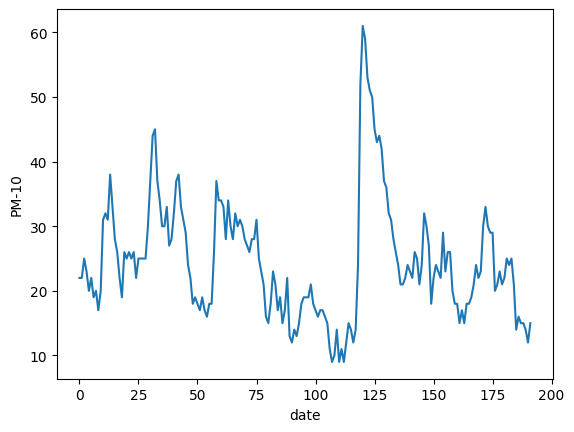

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv("PM10_seoul.csv") 

plt.plot(range(len(df)),df["PM-10"])
plt.xlabel("date") 
plt.ylabel("PM-10") 
plt.show

In [2]:
#2 시간대별 평균 미세먼지 농도 구하기
# 3가지 방법 제안 
# 2-1 str.split 사용
df['time'] = df['date'].str.split(':',expand=True).iloc[:,1] 

# 2-2 str slice 사용
# df['time'] = df['date'].str.slice(-2,0)

# 2-3 apply 사용 
# def get_time(value): 
#     return value[-2:] 
# df['time'] = df['date'].apply(get_time) 

# groupby 를 이용 시간대별 미세먼지 농도 구하기 
df.groupby('time')['PM-10'].mean()

time
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64

In [3]:
# 3 시계열 예측 모델링을 위한 데이터 구조
for k in range(1,5): 
    df['PM-10_' + str(k)] = df['PM-10'].shift(-k) 
df.dropna(inplace=True) 
df = df.drop(['date','time'],axis=1)

In [4]:
X = df.drop('PM-10',axis=1) 
y = df['PM-10'] 

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)

In [5]:
print(model)

LinearRegression()
